# Employee Attrition Rate Predictor

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing Data

In [32]:
df = pd.read_csv('HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
# Removing unwanted columns
df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel'], axis=1, inplace=True)

## Analyzing the Dataset

In [34]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Data Visualization and Analysis

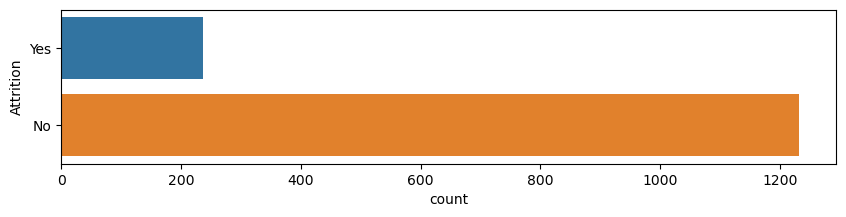

In [36]:
plt.figure(figsize=(10, 2))
sns.countplot(y='Attrition', data=df)
plt.show()

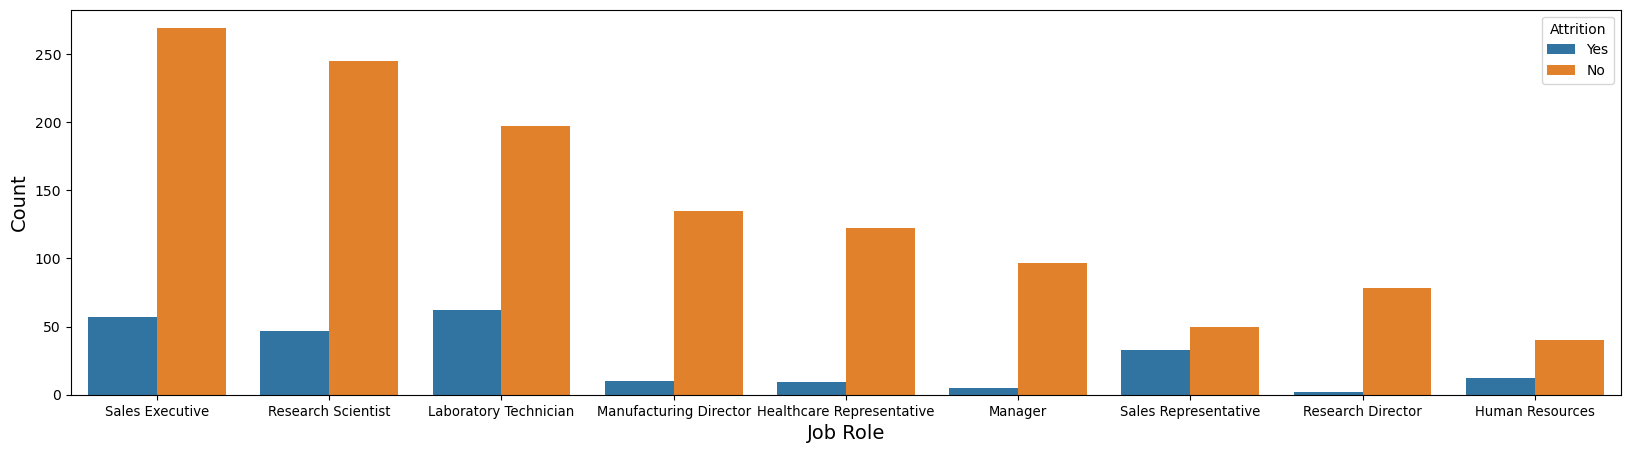

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(hue='Attrition', x='JobRole', data=df)
plt.xticks(fontsize=9.5)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

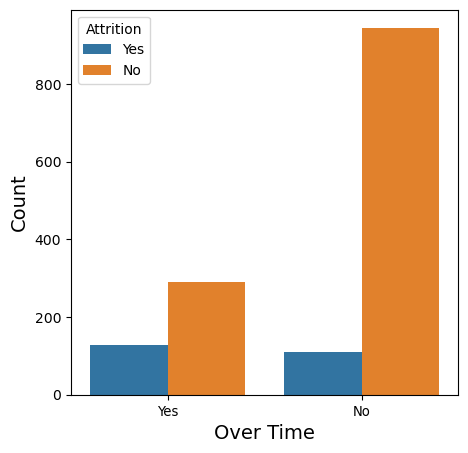

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(hue='Attrition', x='OverTime', data=df)
plt.xticks(fontsize=9.5)
plt.xlabel('Over Time', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

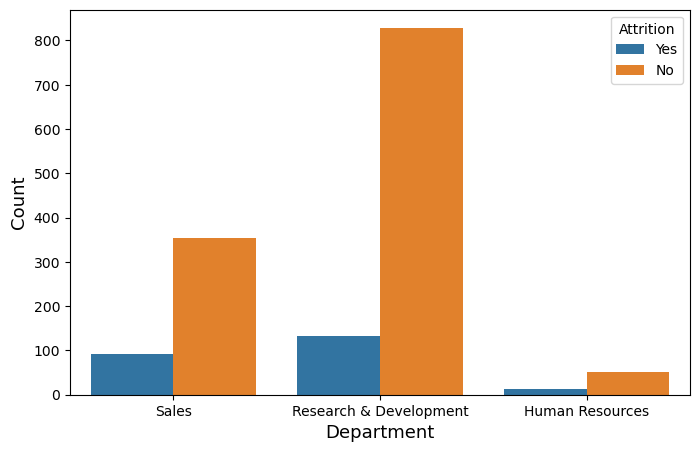

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(hue='Attrition', x='Department', data=df)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

<Figure size 1300x500 with 0 Axes>

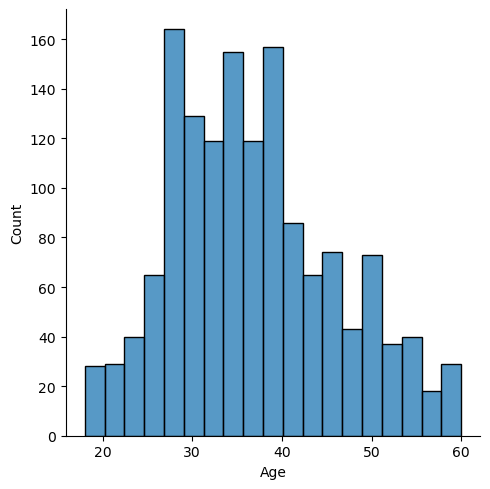

In [40]:
plt.figure(figsize=(13,5))
sns.displot(df['Age'])
plt.show()

## Label Encoding

In [41]:
# Ordinal data 
df['Attrition'] = df['Attrition'].replace({'No':0, 'Yes':1})
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})
df['OverTime'] = df['OverTime'].replace({'No':0, 'Yes':1})

In [42]:
# Nominal Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,6,3,3,2,2,2,2


In [48]:
# All data have been turned to int datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## Splitting the data

In [44]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [45]:
# Oversampling the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print(Counter(y))
sampler = RandomOverSampler(random_state=42)
X_over, y_over = sampler.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

## Training the model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

## Evaluating model's performance

In [28]:
model.score(X_train, y_train)

1.0

In [29]:
prediction = model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, prediction)}") 

Accuracy score: 0.9635627530364372
